In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sc.settings.verbosity = 3           
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.25.2 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10


In [3]:
results_file = 'write/GSE167186_Analysis_1.h5ad'

In [4]:
adata = sc.read_h5ad('write/GSE167186_QC.h5ad')  

In [5]:
adata

# AnnData object with n_obs × n_vars = 56049 × 2724
#     obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
#     var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
#     uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
#     obsm: 'X_pca', 'X_umap'
#     varm: 'PCs'
#     obsp: 'connectivities', 'distances'

AnnData object with n_obs × n_vars = 56049 × 2724
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/opt/homebrew/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/homebrew/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


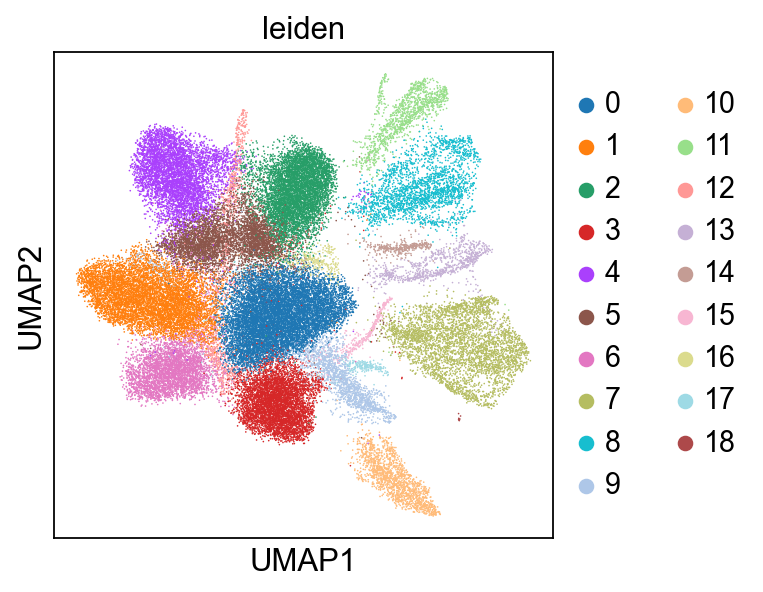

In [7]:
sc.pl.umap(adata, color='leiden')

In [ ]:
# cluster 0  MYH1    IIX
# cluster 1  MYH7    I
# cluster 2  MYH2    IIA
# cluster 3  MYH2    IIA
# cluster 4  MYH7    I
# cluster 5  LGR5    Myogenic Progenitor Cell (MPC) PMID: 33357435
# cluster 6  LGR5    MPC
# cluster 7  COL6A1  Fibro
# cluster 8  ITGA1   Immun
# cluster 9  MYH1    IIX
# cluster 10 PAX7    Stem
# cluster 11 COL5A3  Fibro
# cluster 12 MT-CO1  Dead
# cluster 13 ZEB2    Immun
# cluster 14 ZAP70   Immun
# cluster 15 COL22A1 Fibro
# cluster 16 MYH1    IIX
# cluster 17 ACTC1   Smooth Muscle (SMC)    
# cluster 18 LRP1    SMC

In [15]:
annotation_list = {
    '0':'IIX_1',    
    '1':'I_1',
    '2':'IIA_1',
    '3':'IIA_2',
    '4':'I_2',
    '5':'MPC_1',
    '6':'MPC_2',
    '7':'Fibro_1',
    '8':'Immun_1',
    '9':'IIX_2',
    '10':'Stem',
    '11':'Fibro_2',
    '12':'Dead',
    '13':'Immun_2',
    '14':'Immun_3',
    '15':'Fibro_3',
    '16':'IIX_3',
    '17':'SMC_1',
    '18':'SMC_2'
}

In [16]:
adata.obs['cell_type'] = [annotation_list[clust] for clust in adata.obs['leiden']]

/opt/homebrew/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/homebrew/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


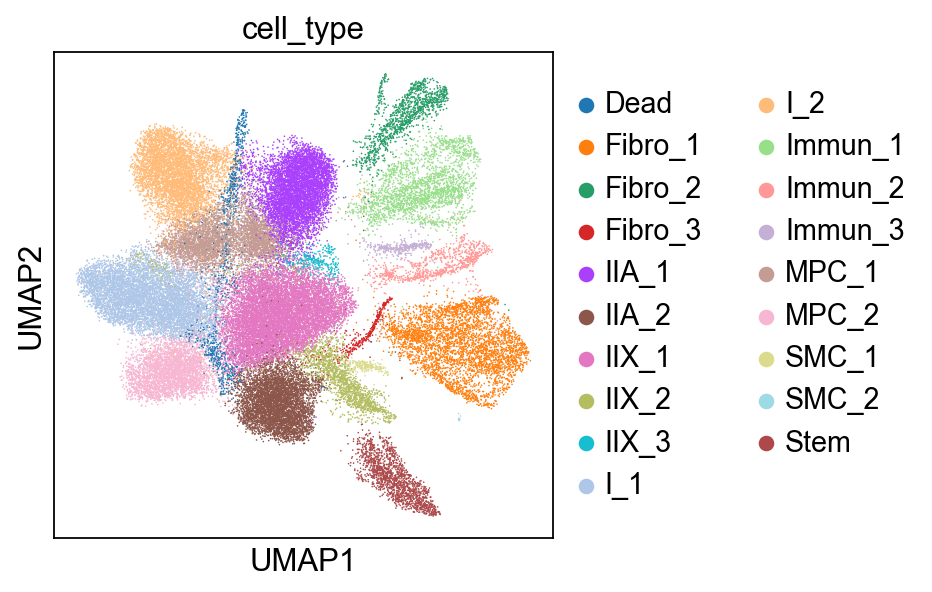

In [17]:
sc.pl.umap(adata, color = 'cell_type')

/opt/homebrew/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/homebrew/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


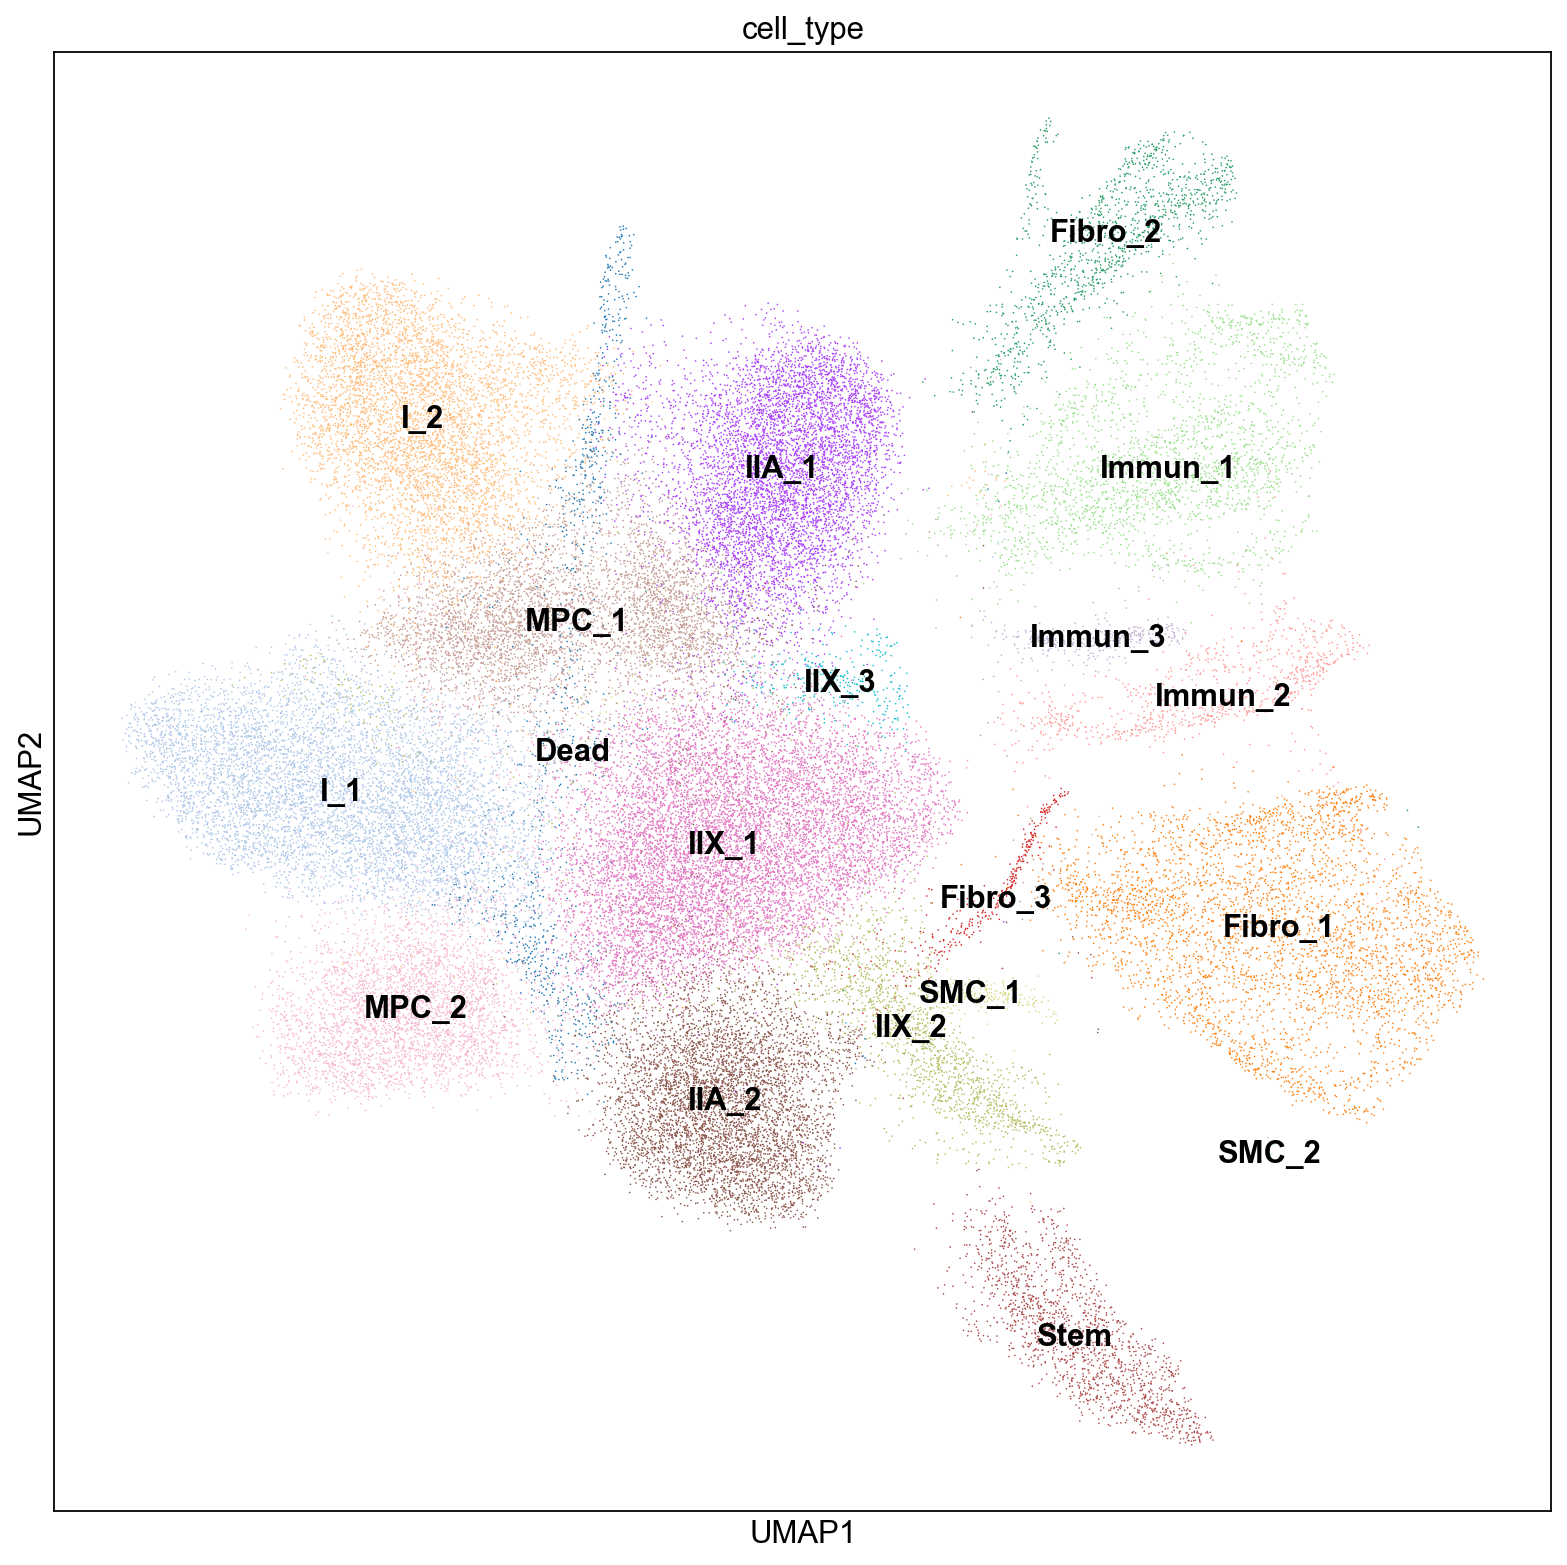

In [25]:
sc.pl.umap(adata, color = 'cell_type', legend_loc = 'on data')
sc.set_figure_params(scanpy = True, figsize = (10, 10), fontsize=6)

In [26]:
adata

AnnData object with n_obs × n_vars = 56049 × 2724
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [29]:
adata.write(results_file)

In [28]:
adata.obs.to_csv("MetaFile_ori.csv")

In [3]:
adata = sc.read_h5ad('write/GSE167186_Analysis_1.h5ad')  

In [5]:
import sys
sys.executable

'/opt/homebrew/opt/python@3.11/bin/python3.11'

In [4]:
from cellphonedb.src.core.methods import cpdb_degs_analysis_method

deconvoluted, means, relevant_interactions, significant_means = cpdb_degs_analysis_method.call(
         cpdb_file_path = cellphonedb.zip,
         meta_file_path = MetaFile.csv,
         counts_file_path = '/write/GSE167186_Analysis_1.h5ad',
         output_path = out_path)

ModuleNotFoundError: No module named 'cellphonedb'